# Phyiscs Problems - Lectures 22 & 23 - Homework 10

FALL 2024


### 1) Altitude of a satellite

A satellite is to be launched into a circular orbit around the Earth so that it orbits the planet once every T seconds.

The altitude h above the Earth’s surface that the satellite must have is:

$$h = \left( \frac{G M T^2}{4\pi^2} \right)^{1/3} - R$$

where $G = 6.67 \times 10^{-11}$ m$^3$ kg$^{-1}$ s$^{-2}$
is Newton's gravitational constant, $M = 5.97 \times 10^{24}$ kg is the mass of the Earth, and $R = 6371$ km is its radius.

#### Write a function that asks the user to enter the desired value of T and then calculates and prints out the correct altitude in meters.


In [50]:
import math

G = 6.67*(10**(-11))
M = 5.97*(10**(24))
R = 6371000
T = int(input("Enter desired value of T"))

def altitude(T):    
    h = (((G*M*(T**2)/(4*(math.pi)**2)))**(1/3))-R
    return h

x = altitude(T)

print("The altiude is", x, "meters")


Enter desired value of T 2592000


The altiude is 401325335.1979237 meters


Use your program to calculate the altitudes of satellites that orbit the Earth once
a day (so-called “geosynchronous” orbit), once every 90 minutes, and once every
45 minutes. What do you conclude from the last of these calculations?





In [26]:
import math

G = 6.67*(10**(-11))
M = 5.97*(10**(24))
R = 6371000

geosync = 86400
hourhalf = 5400
min45 = 2700

def altitude(geosync):
    h = (((G*M*(geosync**2)/(4*(math.pi)**2)))**(1/3))-R
    return h

def altitude(hourhalf):
    h = (((G*M*(hourhalf**2)/(4*(math.pi)**2)))**(1/3))-R
    return h

def altitude(min45):
    h = (((G*M*(min45**2)/(4*(math.pi)**2)))**(1/3))-R
    return h

print("24 hours: Altitude =",altitude(geosync), "; 90 min: Altitude =",altitude(hourhalf),
      ";  45 min: Altitude =",altitude(min45))

print("in conclusion, the smaller the altitude, the faster it spins around the earth")

24 hours: Altitude = 35855910.17617497 ; 90 min: Altitude = 279321.62537285965 ;  45 min: Altitude = -2181559.8978108233
in conclusion, the smaller the altitude, the faster it spins around the earth


Technically a geosynchronous satellite is one that orbits the Earth once persidereal
day, which is 23.93 hours, not 24 hours. Why is this? And how much difference
will it make to the altitude of the satellite?

In [44]:
persidereal = 86148
geosync = 86400

def altitude(geosync):
    h = (((G*M*(geosync**2)/(4*(math.pi)**2)))**(1/3))-R
    return h

def altitude(persidereal):
    h = (((G*M*(persidereal**2)/(4*(math.pi)**2)))**(1/3))-R
    return h

print("24 hours: Altitude =",altitude(geosync), "; Persidereal: Altitude =",altitude(persidereal))

D = altitude(geosync)-altitude(persidereal)

print("the differnce between the two is", D ,"meters. This difference is caused due to the rotation of the earth around the sun.")

24 hours: Altitude = 35855910.17617497 ; Persidereal: Altitude = 35773762.329895645
the differnce between the two is 82147.8462793231 meters. This difference is caused due to the rotation of the earth around the sun.


#### Modify your code to calculate the times from 0.5 hour  to 30 days, in steps of 0.5 hours.   Then plot those data points (time vs h) with properly labled axes.  Plot orbits with height below 0 as red, and plots positive heeghts with times less than geosynchronous in blue and those longer in green.

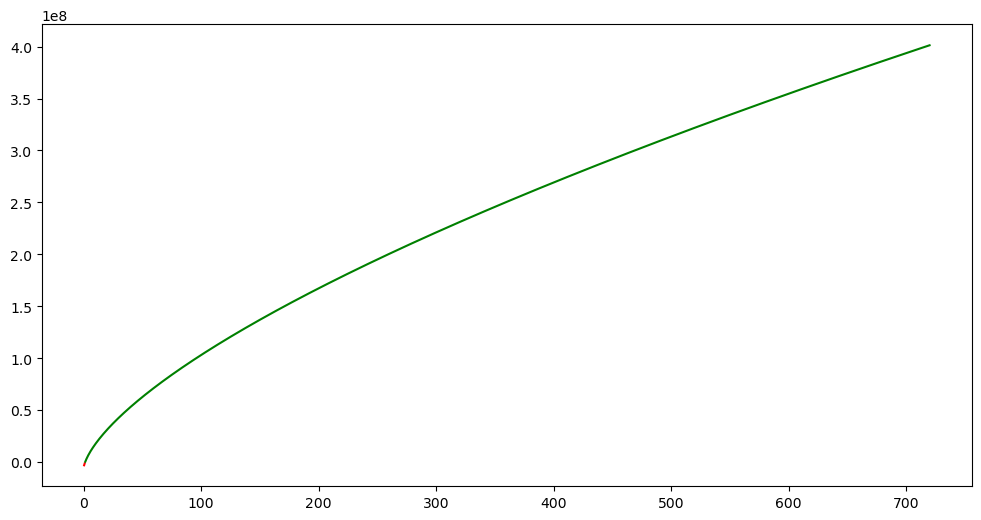

In [52]:
import numpy as np
import matplotlib.pyplot as plt

G = 6.67*(10**(-11))
M = 5.97*(10**(24))
R = 6371000

x = np.arange(0.5,720.5,0.5)
y = (((G*M*((x*3600)**2)/(4*(math.pi)**2)))**(1/3))-R #converted from hours to seconds using (X*3600) 

plt.figure(figsize=(12,6))

plt.plot(x[y<0],y[y<0], 'r', label='altitude <0') #criteria for red
plt.plot(x[(y>0) & (y<23.93)],y[(y>0) & (y<23.93)], 'b', label='above zero and less than geosynchronous') #criteria for blue
plt.plot(x[(y>23.93)],y[(y>23.93)], 'g', label='greater than geosynchronous') #criteria for green

### 2) Special Relativity

A spaceship travels from Earth in a straight line at a (relativistic)
speed $v$ to another planet $x$ light years away. Write a program to ask
the user for the value of $x$ and the speed $v$ as a fraction of the speed
of light, then print out the time in years that the spaceship takes to
reach its destination (a) in the rest frame of an observer on Earth
and (b) as perceived by a passenger on board the ship.

$$x' = \gamma (x - vt)$$

$$t' = \gamma \left(t - \frac{v x}{c^2}\right)$$

$$\gamma = \frac{1}{\sqrt{1 - \frac{v^2}{c^2}}}$$


In [78]:

d = int(input("Provide distance to plant in light years:"))
v = float(input("Provide fraction of speed of light traveling in decimals:"))

Gamma = 1/ ((1-v**2)**(1/2))

#print(Gamma)

t_earth = d/v
t_spaceship = t_earth/Gamma

print("In the rest frame of an observer on Earth, this trip will last", t_earth, "years")
print("As perceived by a passenger on board the ship, this trip will last", t_spaceship, "years")

Provide distance to plant in light years: 10
Provide fraction of speed of light traveling in decimals: .999


In the rest frame of an observer on Earth, this trip will last 10.01001001001001 years
As perceived by a passenger on board the ship, this trip will last 0.4475493274496098 years


#### Use your program to calculate the answers for a planet 10 light years away with $v = 0.90c$,  $v = 0.98c$, $v = 0.999c$.

In [76]:
d = 10
v1 = 0.9
v2 = 0.98
v3 = 0.999

Gamma1 = 1/ ((1-v1**2)**(1/2))
Gamma2 = 1/ ((1-v2**2)**(1/2))
Gamma3 = 1/ ((1-v3**2)**(1/2))

te1 = d/v1
te2 = d/v2
te3 = d/v3

ts1 = te1 / Gamma1
ts2 = te2 / Gamma2
ts3 = te3 / Gamma3


print("Traveling at 90% the speed of light will last", te1, "years on earth, and", ts1, "years on the spaceship.")
print("Traveling at 98% the speed of light will last", te2, "years on earth, and", ts2, "years on the spaceship.")
print("Traveling at 99.9% the speed of light will last", te3, "years on earth, and", ts3, "years on the spaceship.")

Traveling at 90% the speed of light will last 11.11111111111111 years on earth, and 4.843221048378525 years on the spaceship.
Traveling at 98% the speed of light will last 10.204081632653061 years on earth, and 2.030586606340043 years on the spaceship.
Traveling at 99.9% the speed of light will last 10.01001001001001 years on earth, and 0.4475493274496098 years on the spaceship.


### 3) The quadratic equation

 Write a program that takes as input three numbers, $a$, $b$, and $c$, and prints out the two solutions to the quadratic equation $ax^2 + bx + c = 0$ using the standard
formula:

$$x = \frac{-b \pm \sqrt{b^2 - 4ac}}{2a}$$

Use your program to compute the solutions of $0.001x^2 + 1000x + 0.001 = 0$.

In [90]:
a = float(input("Provide a of quadratic equation (ie. ax^2 + bx + c = 0):"))
b = float(input("Provide b of quadratic equation (ie. ax^2 + bx + c = 0):"))
c = float(input("Provide c of quadratic equation (ie. ax^2 + bx + c = 0):"))

x1 = (-b + (((b**2) - 4*a*c)**(1/2)) )/(2*a)
x2 = (-b - (((b**2) - 4*a*c)**(1/2)) )/(2*a)

print("Your solutions are", x1, "and", x2)

Provide a of quadratic equation (ie. ax^2 + bx + c = 0): .001
Provide b of quadratic equation (ie. ax^2 + bx + c = 0): 1000
Provide c of quadratic equation (ie. ax^2 + bx + c = 0): .001


Your solutions are -9.999894245993346e-07 and -999999.999999


In [ ]:
a = float(input("Provide a of quadratic equation (ie. ax^2 + bx + c = 0):"))
b = float(input("Provide b of quadratic equation (ie. ax^2 + bx + c = 0):"))
c = float(input("Provide c of quadratic equation (ie. ax^2 + bx + c = 0):"))

x1 = (-b + (((b**2) - 4*a*c)**(1/2)) )/(2*a)
x2 = (-b - (((b**2) - 4*a*c)**(1/2)) )/(2*a)

print("Your solutions are", x1, "and", x2)

There is another way to write the solutions to a quadratic equation. Multiplying top and bottom of the solution above by $-b \mp \sqrt{b^2 - 4ac}$, show that the solutions
can also be written as:

$$x = \frac{2c}{-b \mp \sqrt{b^2 - 4ac}}$$

Add further lines to your program to print these values in addition to the earlier ones and again use the program to solve $0.001x^2 + 1000x + 0.001 = 0$. What do you see? How do you explain it?

In [92]:
a = float(input("Provide a of quadratic equation (ie. ax^2 + bx + c = 0):"))
b = float(input("Provide b of quadratic equation (ie. ax^2 + bx + c = 0):"))
c = float(input("Provide c of quadratic equation (ie. ax^2 + bx + c = 0):"))

x1 = (2*c)/(-b - (((b**2)-4*a*c)**(1/2)))
x2 = (2*c)/(-b + (((b**2)-4*a*c)**(1/2)))

print("Your solutions are", x1, "and", x2)

Provide a of quadratic equation (ie. ax^2 + bx + c = 0): .001
Provide b of quadratic equation (ie. ax^2 + bx + c = 0): 1000
Provide c of quadratic equation (ie. ax^2 + bx + c = 0): .001


Your solutions are -1.000000000001e-06 and -1000010.5755125057


Using what you have learned, write a new program that calculates both roots of a quadratic equation accurately in all cases. 

__(NOTE: MANY Online quadratic equation are WRONG, so careful how you check!!!).__